In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error, r2_score
import datetime
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
x_train = pd.read_csv("/content/drive/MyDrive/GOOG_train.csv", index_col = "Date", parse_dates = True)
x_train.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-06-10,719.469971,725.890015,716.429993,719.409973,719.409973,1216400
2016-06-13,716.510010,725.440002,716.510010,718.359985,718.359985,1258900
2016-06-14,716.479980,722.469971,713.119995,718.270020,718.270020,1306100
2016-06-15,719.000000,722.979980,717.309998,718.919983,718.919983,1214500
2016-06-16,714.909973,716.650024,703.260010,710.359985,710.359985,1982500


In [6]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2016-06-10 to 2021-06-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


In [7]:
x_train.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,1212.412150,1224.570048,1201.347431,1213.457483,1213.457483,1.610740e+06
std,379.454923,384.609149,375.747847,380.308660,380.308660,7.031610e+05
min,671.000000,672.299988,663.283997,668.260010,668.260010,3.468000e+05
25%,957.377518,963.404984,950.767502,958.119980,958.119980,1.184300e+06
50%,1130.574951,1142.984985,1117.374024,1132.005005,1132.005005,1.423200e+06
75%,1357.785034,1372.300995,1346.885010,1358.957519,1358.957519,1.823950e+06
max,2499.500000,2505.000000,2487.330078,2491.399902,2491.399902,6.207000e+06


In [8]:
x_train.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [9]:
"""Close = []
for col in x_train["Close"]:
  Close.append("".join(col.split(",")))

x_train["Close"] = Close"""

'Close = []\nfor col in x_train["Close"]:\n  Close.append("".join(col.split(",")))\n\nx_train["Close"] = Close'

In [10]:
x_train["Close"] =  x_train["Close"].astype(float)

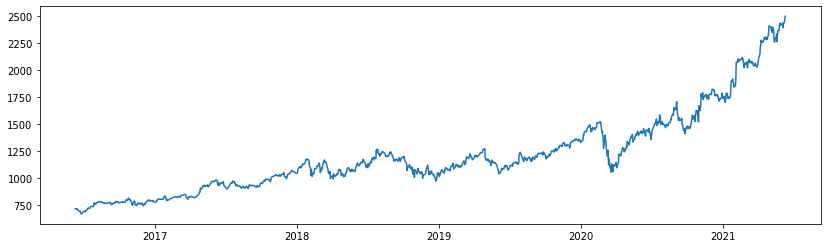

In [11]:
plt.figure(figsize = (14,4))
plt.plot(x_train.index, x_train["Open"])

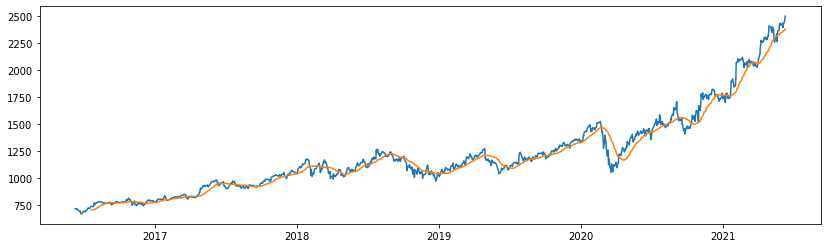

In [12]:
plt.figure(figsize = (14,4))
plt.plot(x_train.index, x_train["Open"])
plt.plot(x_train.index, x_train["Close"].rolling(window = 30).mean())

In [13]:
x_train["Close_30_Days_Mean"] = x_train["Close"].rolling(window = 30).mean()

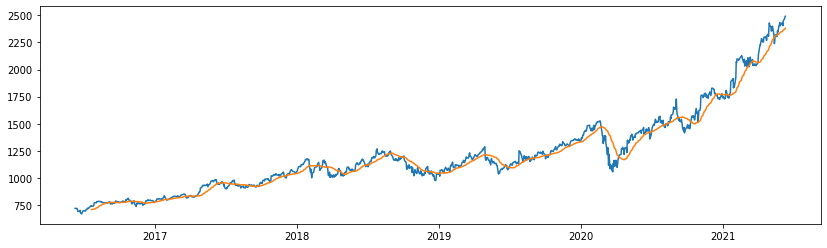

In [14]:
plt.figure(figsize = (14,4))
plt.plot(x_train.index, x_train["Close"])
plt.plot(x_train.index, x_train["Close_30_Days_Mean"])

In [15]:
x_train.rolling(7).mean().head(20)

,Open,High,Low,Close,Adj Close,Volume,Close_30_Days_Mean
Date,,,,,,,
2016-06-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-20,713.398568,717.818568,706.927429,710.107134,710.107134,1.780471e+06,NaN
2016-06-21,710.388576,714.515712,703.438860,706.754281,706.754281,1.816071e+06,NaN
2016-06-22,707.895717,711.004281,700.091997,703.768572,703.768572,1.805414e+06,NaN


In [16]:
x_train.rolling(window = 30).mean().head(60)

,Open,High,Low,Close,Adj Close,Volume,Close_30_Days_Mean
Date,,,,,,,
2016-06-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
x_train = x_train["Close"]
x_train = pd.DataFrame(x_train)

In [18]:
x_train.head()

,Close
Date,
2016-06-10,719.409973
2016-06-13,718.359985
2016-06-14,718.270020
2016-06-15,718.919983
2016-06-16,710.359985


In [19]:
scaler = MinMaxScaler(feature_range = (0,1))
x_train_scaled = scaler.fit_transform(x_train)

In [20]:
x_train_scaled

array([[0.02805597],
       [0.02748005],
       [0.0274307 ],
       ...,
       [0.98611746],
       [0.9953104 ],
       [1.        ]])

In [21]:
x_train_scaled.shape

(1258, 1)

In [22]:
x_train_scaled_final = []
y_train_scaled_final = []
for i in range(30,1258):
  x_train_scaled_final.append(x_train_scaled[i-30:i,0])
  y_train_scaled_final.append(x_train_scaled[i,0])

x_train_scaled = np.array(x_train_scaled_final)
y_train_scaled = np.array(y_train_scaled_final)

In [23]:
x_train_scaled.shape

(1228, 30)

In [24]:
x_train_scaled = x_train_scaled.reshape(1228,30,1)

In [25]:
x_train_scaled.shape

(1228, 30, 1)

In [26]:
y_train_scaled.shape

(1228,)

In [59]:
model = Sequential()

In [60]:
model.add(LSTM(units = 400, return_sequences = True, input_shape = (x_train_scaled.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 300, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 150, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

In [61]:
model.compile(optimizer = "adam", loss = "mean_squared_error")

model.fit(x_train_scaled, y_train_scaled, epochs = 20, batch_size = 30)

Epoch 1/20
41/41 [==============================] - 29s 490ms/step - loss: 0.0257
Epoch 2/20
41/41 [==============================] - 21s 511ms/step - loss: 0.0029
Epoch 3/20
41/41 [==============================] - 21s 503ms/step - loss: 0.0020
Epoch 4/20
41/41 [==============================] - 21s 505ms/step - loss: 0.0028
Epoch 5/20
41/41 [==============================] - 21s 520ms/step - loss: 0.0019
Epoch 6/20
41/41 [==============================] - 21s 504ms/step - loss: 0.0017
Epoch 7/20
41/41 [==============================] - 21s 503ms/step - loss: 0.0017
Epoch 8/20
41/41 [==============================] - 20s 495ms/step - loss: 0.0016
Epoch 9/20
41/41 [==============================] - 20s 498ms/step - loss: 0.0020
Epoch 10/20
41/41 [==============================] - 21s 508ms/step - loss: 0.0018
Epoch 11/20
41/41 [==============================] - 20s 495ms/step - loss: 0.0014
Epoch 12/20
41/41 [==============================] - 20s 499ms/step - loss: 0.0014
Epoch 13/20
4

In [62]:
x_train = pd.DataFrame(x_train)

In [63]:
test_df = pd.read_csv("/content/drive/MyDrive/GOOG_test.csv", index_col = "Date", parse_dates = True)
test_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-10,2494.010010,2523.260010,2494.000000,2521.600098,2521.600098,1561700
2021-06-11,2524.919922,2526.989990,2498.290039,2513.929932,2513.929932,1262000
2021-06-14,2513.389893,2528.229980,2500.939941,2527.040039,2527.040039,1127500
2021-06-15,2530.439941,2537.239990,2512.969971,2520.659912,2520.659912,1109100
2021-06-16,2524.949951,2530.469971,2482.999023,2513.929932,2513.929932,1315800


In [64]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2021-06-10 to 2022-06-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       253 non-null    float64
 1   High       253 non-null    float64
 2   Low        253 non-null    float64
 3   Close      253 non-null    float64
 4   Adj Close  253 non-null    float64
 5   Volume     253 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [65]:
real_stock_price = pd.DataFrame(test_df["Close"])

In [66]:
real_stock_price

,Close
Date,
2021-06-10,2521.600098
2021-06-11,2513.929932
2021-06-14,2527.040039
2021-06-15,2520.659912
2021-06-16,2513.929932
...,...
2022-06-03,2291.280029
2022-06-06,2340.209961
2022-06-07,2344.590088


In [67]:
test_df = pd.DataFrame(test_df["Close"])

In [68]:
test_df

,Close
Date,
2021-06-10,2521.600098
2021-06-11,2513.929932
2021-06-14,2527.040039
2021-06-15,2520.659912
2021-06-16,2513.929932
...,...
2022-06-03,2291.280029
2022-06-06,2340.209961
2022-06-07,2344.590088


In [69]:
data_set_total = pd.concat((x_train, test_df), axis = 0)
inputs = data_set_total[len(data_set_total) - len(test_df) - 30:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
x_test = []
for i in range(30,283):
  x_test.append(inputs[i - 30: i, 0])

x_test = np.array(x_test)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
predicted_stock_price = model.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [70]:
predicted_stock_price = pd.DataFrame(predicted_stock_price, index = test_df.index)

In [71]:
predicted_stock_price

,0
Date,
2021-06-10,2464.986816
2021-06-11,2474.058838
2021-06-14,2485.263672
2021-06-15,2497.868896
2021-06-16,2510.532471
...,...
2022-06-03,2229.570312
2022-06-06,2249.883789
2022-06-07,2274.918457


In [72]:
np.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

89.25136258923565

In [73]:
r2_score(real_stock_price, predicted_stock_price)

0.810502938020413

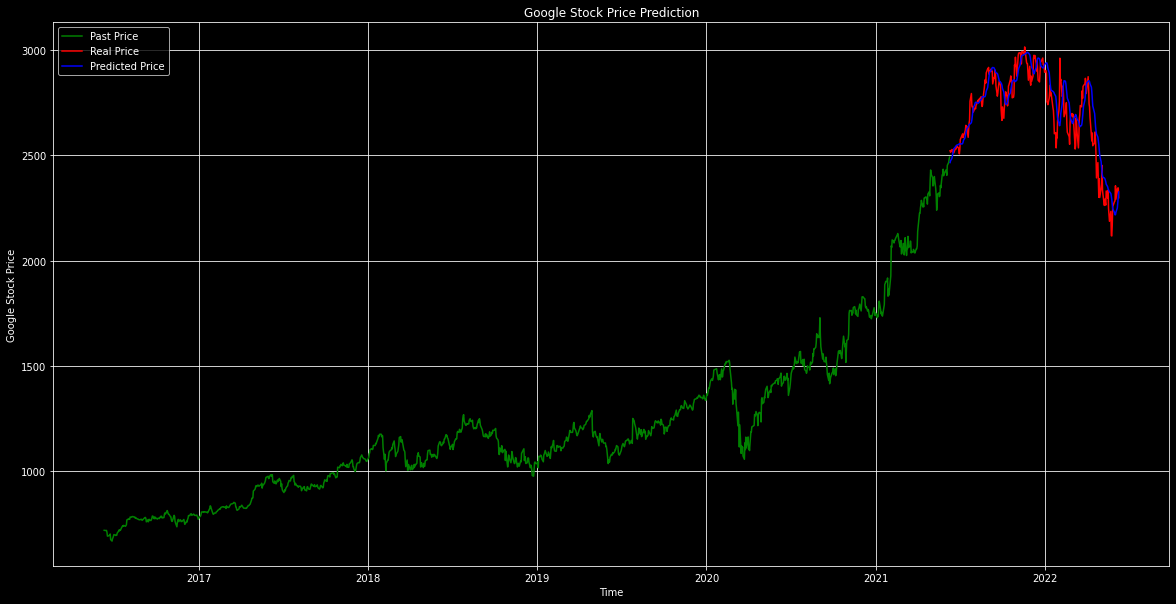

In [74]:
plt.figure(figsize = (20,10))
plt.style.use("dark_background")

plt.plot(x_train, color = 'green', label = 'Past Price')
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Price')

plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.grid()
plt.show()